#Conversões
* Gênero = masculio (0), feminino (1), não binário (2)
* Idade = entre 18 e 80
* Tipo de cozinha = japonesa (0), italiana (1), árabe (2), mexicana (3), fast food (4), francesa (6)
* Bebida = não (0), não alcoólica (1), alcoólica (2)
* Sobremesa = não (0), sim (1)

In [2]:

#importando bibliotecas
import pandas as pd

#importando o arquivo
df = pd.read_csv('baseSimulada/DatasetSimuladoPI.csv', sep=';')
df.head()

,genero,idade,tipo cozinha,bebida,sobremesa
0,2,69,2,2,0
1,2,66,1,0,0
2,0,18,2,2,1
3,2,24,6,1,1
4,2,28,0,0,1


#Elimina dados duplicados


In [3]:
df_duplicates = df [ df.duplicated(subset=['genero','idade','tipo cozinha','bebida','sobremesa'], keep=False)]

#se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates) > 0:
  print('\nAmostras redundantes ou inconsistentes:')
  display(df_duplicates)
else:
  print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,genero,idade,tipo cozinha,bebida,sobremesa
0,2,69,2,2,0
1,2,66,1,0,0
2,0,18,2,2,1
3,2,24,6,1,1
4,2,28,0,0,1
...,...,...,...,...,...
9994,2,41,5,0,0
9995,0,40,6,1,0
9997,0,53,0,2,0
9998,2,66,1,2,0


#Principais estatísticas


In [4]:
#apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes)

,genero,idade,tipo cozinha,bebida,sobremesa
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.004300,48.982400,3.037000,1.001600,0.497600
std,0.813602,18.067837,1.993346,0.824176,0.500019
min,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,1.000000,0.000000,0.000000
50%,1.000000,49.000000,3.000000,1.000000,0.000000
75%,2.000000,65.000000,5.000000,2.000000,1.000000
max,2.000000,80.000000,6.000000,2.000000,1.000000


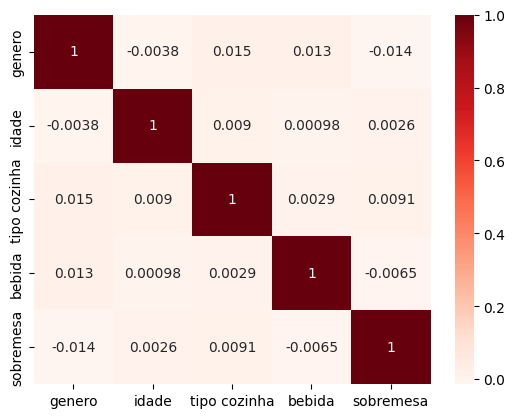

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

sns.heatmap(df.corr(), annot=True, cmap="Reds") 
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

y = df["sobremesa"]
x = df.drop("sobremesa", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#cria os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [9]:
from sklearn import metrics

#cria as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

5.860884413355638e-05
-0.28875159778142323


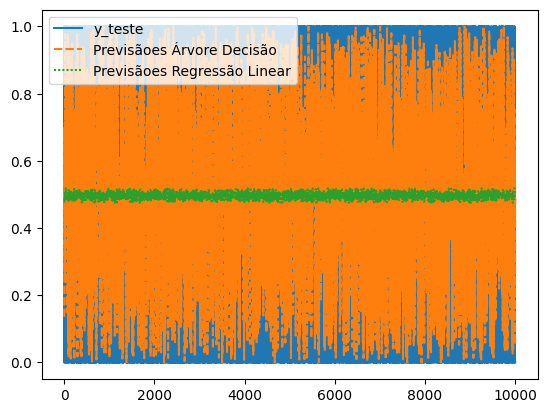

In [10]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsãoes Árvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsãoes Regressão Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()